<a href="https://colab.research.google.com/github/namozhdehi/KSR/blob/main/1_Ecommerce_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement and Data Description

**Problem Statement:** Identify high-value customers for a UK-based online gift retail store using clustering methodologies. Based on transactional data from Nov 2016 to Dec 2017, segment customers to design a loyalty program for significant buyers.

Data Description:

- **InvoiceNo	Invoice number:** A 6-digit integral number uniquely assigned to each transaction.
- **StockCode:**	Product (item) code
- **Description:** 	Product (item) name
- **Quantity:** 	The quantities of each product (item) per transaction
- **InvoiceDate:**	The day when each transaction was generated
- **UnitPrice:**	Unit price (Product price per unit)
- **CustomerID:**	Customer number (Unique ID assigned to each customer)
- **Country:**	Country name (The name of the country where each customer resides)


# 2. Loading Required Libraries and Datasets

In [64]:
import numpy as np
import pandas as pd

In [65]:
df = pd.read_csv('Ecommerce.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [66]:
df = df.drop(columns=['Unnamed: 8'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 3. Explore The Data

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [68]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France


In [69]:
df.shape

(541909, 8)

In [70]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

2.5.1 Variable Identification and Typecasting

In [71]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


- **InvoiceDate** has the data type object, but its a datetime variable
- **CustomerID** field datatype is float, but it should be a categorical variables.

#### Datetime variable
InvoiceDate:
- What is the date range of the invoices?
- Are there any missing or incorrect date entries?
- Is the format consistent throughout the dataset?

#### Numerical Variables
Quantity and UnitPrice:

- Check the distribution of these variables.
- Are there any extreme or unrealistic values (e.g., negative quantities or prices)?
- Are there any missing or zero values?

#### Categorical Variables
InvoiceNo, StockCode, Description, Country , CustomerID:

- Are there any missing values?
- Are the they unique and consistent?

## 3.1. Datetime variable: InvoiceDate

In [72]:
# convert into the date time format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%b-%y')

In [73]:
df['InvoiceDate'].isna().sum()

0

In [74]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2016-11-29 00:00:00'), Timestamp('2017-12-07 00:00:00'))

The data collected is from Nov 2016 to Dec 2017.

In [75]:
# Convert date field to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# day of year
df['Invoice_year'] = df['InvoiceDate'].dt.year

# month of year
df['Invoice_month'] = df['InvoiceDate'].dt.month

# day of month
df['Invoice_DoM'] = df['InvoiceDate'].dt.day

# day of week
df['Invoice_day'] = df['InvoiceDate'].dt.dayofweek

# day of the week name
df['Invoice_DoW'] = df['InvoiceDate'].dt.day_name()

# month name
df['Invoice_monthN'] = df['InvoiceDate'].dt.month_name()
df.head()

In [76]:
# checking new extracted columns using datetime
df[['InvoiceDate','Invoice_year','Invoice_month','Invoice_day']].head()

,InvoiceDate,Invoice_year,Invoice_month,Invoice_day
0,2016-11-29,2016,11,1
1,2016-11-29,2016,11,1
2,2016-11-29,2016,11,1
3,2016-11-29,2016,11,1
4,2016-11-29,2016,11,1


### 3.1.1. Missing dates

In [78]:
(df['InvoiceDate'].max() - df['InvoiceDate'].min())

Timedelta('373 days 00:00:00')

In [79]:
df['InvoiceDate'].nunique()

305

The data covers 373 days, but there are only 305 unique dates in the dataset. This means some dates are missing, possibly due to non-working days or gaps in data collection. This should be checked further to understand why some dates are not included.

In [80]:
df['InvoiceDate'].dt.day_name().value_counts()

,count
InvoiceDate,
Wednesday,103857
Monday,101808
Sunday,95111
Tuesday,94565
Thursday,82193
Saturday,64375


- **Peak Day:** Wednesday is the most active day for invoices.
- **Low Activity Day:** Saturday has the least number of invoices, suggesting it might not be a busy sales day for the store.
- **No Friday:** There is no data recorded for Friday, which might indicate a gap or that the store does not operate on Fridays.
- The trend indicates that the majority of sales happen on weekdays, especially at the start and middle of the week.

#### 3.1.2 Missing week

In [81]:
# Create a list of all Mondays between the minimum and maximum dates
all_weeks = pd.date_range(df['InvoiceDate'].min(), df['InvoiceDate'].max(), freq='W-MON')

# Extract the week start (Monday) for each invoice date, handling NaT values
df['WeekStart'] = df['InvoiceDate'].dt.to_period('W').apply(lambda x: x.start_time if pd.notna(x) else pd.NaT)

# Identify missing weeks
missing_weeks = [week for week in all_weeks if week not in df['WeekStart'].unique()]

# Print missing weeks
print("Missing weeks:", missing_weeks)

Missing weeks: [Timestamp('2016-12-26 00:00:00')]


The retail store might have been closed during this week due to **holidays** (e.g., around Christmas/New Year).

## 3.2. Numerical Variables: Quantity and UnitPrice

In [82]:
df['Quantity'].isnull().sum()

0

In [83]:
df['Quantity'].nunique(), df['UnitPrice'].nunique()

(722, 1630)

### 3.2.1. Quantity

In [84]:
(df['Quantity'].value_counts()).sort_values()

,count
Quantity,
-80995,1
1020,1
234,1
148,1
-696,1
...,...
4,38484
6,40868
12,61063


**Frequent Positive Quantities:**

- Quantity 1 is the most frequent (148,227 times), followed by 2 (81,829 times), 12 (61,063 times), and 6 (40,866 times), indicating common purchase sizes.
- Extreme values like 1020 and -80995 appear only once, suggesting potential anomalies or rare bulk transactions.
- The Quantity column covers a wide range, reflecting varied transaction sizes, including single-item purchases, bulk orders, and returns.

In [85]:
df['Quantity'].describe()

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [86]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN,WeekStart
141,C536379,D,Discount,-1,2016-11-29,27.50,14527.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,14397.0,United Kingdom,2017,12,7,3,Thursday,December,2017-12-04
541541,C581499,M,Manual,-1,2017-12-07,224.69,15498.0,United Kingdom,2017,12,7,3,Thursday,December,2017-12-04
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,15311.0,United Kingdom,2017,12,7,3,Thursday,December,2017-12-04
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,17315.0,United Kingdom,2017,12,7,3,Thursday,December,2017-12-04


In [87]:
# Filter rows with negative Quantity
negative_quantity_df = df[df['Quantity'] < 0]

# Merge to find other transactions with the same InvoiceDate and CustomerID
related_transactions = pd.merge(
    negative_quantity_df[['InvoiceDate', 'CustomerID']],
    df,
    on=['InvoiceDate', 'CustomerID'],
    suffixes=('_negative', '_related')
)

# Exclude rows that are already in the negative_quantity_df
related_transactions = related_transactions[~related_transactions.index.isin(negative_quantity_df.index)]

# Sort by CustomerID, InvoiceDate, Quantity, and UnitPrice
related_transactions = related_transactions.sort_values(by=['CustomerID', 'InvoiceDate', 'StockCode'])

# Display the related transactions
related_transactions.head(60)

,InvoiceDate,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN,WeekStart
195802,2017-01-16,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,United Kingdom,2017,1,16,0,Monday,January,2017-01-16
195803,2017-01-16,12346.0,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1.04,United Kingdom,2017,1,16,0,Monday,January,2017-01-16
278563,2017-02-27,12352.0,545323,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,Norway,2017,2,27,0,Monday,February,2017-02-27
278574,2017-02-27,12352.0,545323,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,Norway,2017,2,27,0,Monday,February,2017-02-27
278585,2017-02-27,12352.0,545323,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,Norway,2017,2,27,0,Monday,February,2017-02-27
278561,2017-02-27,12352.0,545323,22654,DELUXE SEWING KIT,6,5.95,Norway,2017,2,27,0,Monday,February,2017-02-27
278572,2017-02-27,12352.0,545323,22654,DELUXE SEWING KIT,6,5.95,Norway,2017,2,27,0,Monday,February,2017-02-27
278583,2017-02-27,12352.0,545323,22654,DELUXE SEWING KIT,6,5.95,Norway,2017,2,27,0,Monday,February,2017-02-27
278564,2017-02-27,12352.0,545323,22844,VINTAGE CREAM DOG FOOD CONTAINER,4,8.50,Norway,2017,2,27,0,Monday,February,2017-02-27
278575,2017-02-27,12352.0,545323,22844,VINTAGE CREAM DOG FOOD CONTAINER,4,8.50,Norway,2017,2,27,0,Monday,February,2017-02-27


The presence of negative quantities (10624 rows) indicates **returns** of items.

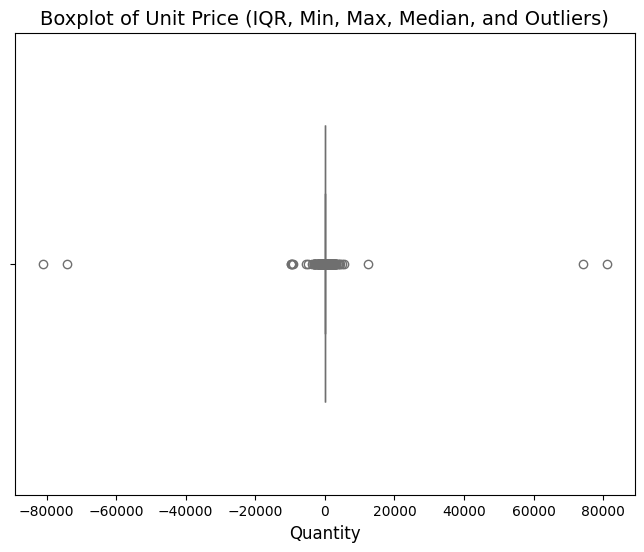

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(x=df['Quantity'], color='skyblue', width=0.6)

# Add labels and title
plt.xlabel('Quantity', fontsize=12)
plt.title('Boxplot of Unit Price (IQR, Min, Max, Median, and Outliers)', fontsize=14)

# Show the plot
plt.show()

In [89]:
df_nooutlier = df[(df['Quantity'] > 0) & (df['Quantity'] < 20)]
df_nooutlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN,WeekStart
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2017-12-07,0.85,12680.0,France,2017,12,7,3,Thursday,December,2017-12-04
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2017-12-07,2.10,12680.0,France,2017,12,7,3,Thursday,December,2017-12-04
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2017-12-07,4.15,12680.0,France,2017,12,7,3,Thursday,December,2017-12-04
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2017-12-07,4.15,12680.0,France,2017,12,7,3,Thursday,December,2017-12-04


<Figure size 800x600 with 0 Axes>

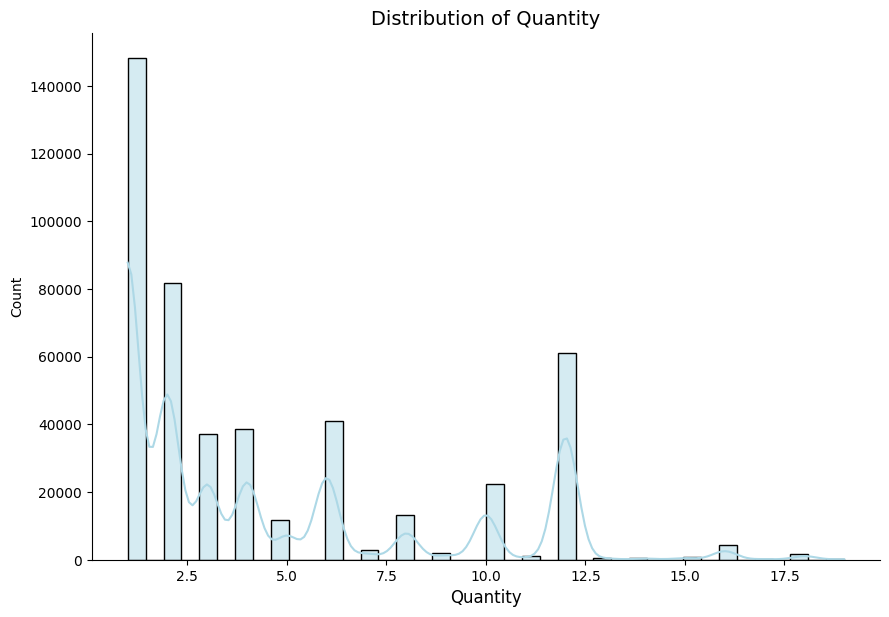

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.displot(df_nooutlier['Quantity'], bins=40, kde=True, color='lightblue', height=6, aspect=1.5)
plt.xlabel('Quantity', fontsize=12)
plt.title('Distribution of Quantity', fontsize=14)
plt.show()

**Key Observations:**
- **Right-Skewed Distribution:** The majority of quantities are concentrated at lower values, indicating that most transactions involve a small number of items.
The distribution has a long tail, representing higher quantities, but these are less frequent.

- **Outliers:** While the frequency of higher quantities is low, their presence in the tail could indicate bulk purchases, large-scale orders, or potential data anomalies.

### 3.2.1. UnitPrice

In [91]:
df[ 'UnitPrice'].isnull().sum()

0

In [92]:
(df['UnitPrice'].value_counts()).sort_values()

,count
UnitPrice,
2114.00,1
164.46,1
208.12,1
166.92,1
212.04,1
...,...
0.42,24533
2.95,27768
0.85,28497


In [93]:
df['UnitPrice'].describe()

,UnitPrice
count,541909.000000
mean,4.611114
std,96.759853
min,-11062.060000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000


In [94]:
df[df['UnitPrice'] < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN,WeekStart
299983,A563186,B,Adjust bad debt,1,2017-08-10,-11062.06,NaN,United Kingdom,2017,8,10,3,Thursday,August,2017-08-07
299984,A563187,B,Adjust bad debt,1,2017-08-10,-11062.06,NaN,United Kingdom,2017,8,10,3,Thursday,August,2017-08-07


In [95]:
df[df['UnitPrice'] == 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN,WeekStart
622,536414,22139,NaN,56,2016-11-29,0.0,NaN,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
1970,536545,21134,NaN,1,2016-11-29,0.0,NaN,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
1971,536546,22145,NaN,1,2016-11-29,0.0,NaN,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
1972,536547,37509,NaN,1,2016-11-29,0.0,NaN,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
1987,536549,85226A,NaN,1,2016-11-29,0.0,NaN,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2017-12-06,0.0,NaN,United Kingdom,2017,12,6,2,Wednesday,December,2017-12-04
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2017-12-06,0.0,NaN,United Kingdom,2017,12,6,2,Wednesday,December,2017-12-04
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2017-12-06,0.0,NaN,United Kingdom,2017,12,6,2,Wednesday,December,2017-12-04
538554,581408,85175,NaN,20,2017-12-06,0.0,NaN,United Kingdom,2017,12,6,2,Wednesday,December,2017-12-04


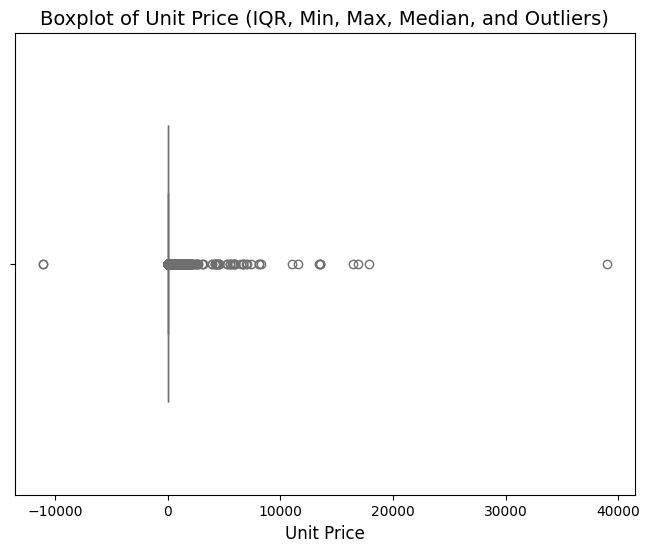

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(x=df['UnitPrice'], color='skyblue', width=0.6)

# Add labels and title
plt.xlabel('Unit Price', fontsize=12)
plt.title('Boxplot of Unit Price (IQR, Min, Max, Median, and Outliers)', fontsize=14)

# Show the plot
plt.show()

In [97]:
df_nooutlier = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < 50)]
df_nooutlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN,WeekStart
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2017-12-07,0.85,12680.0,France,2017,12,7,3,Thursday,December,2017-12-04
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2017-12-07,2.10,12680.0,France,2017,12,7,3,Thursday,December,2017-12-04
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2017-12-07,4.15,12680.0,France,2017,12,7,3,Thursday,December,2017-12-04
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2017-12-07,4.15,12680.0,France,2017,12,7,3,Thursday,December,2017-12-04


<Figure size 800x600 with 0 Axes>

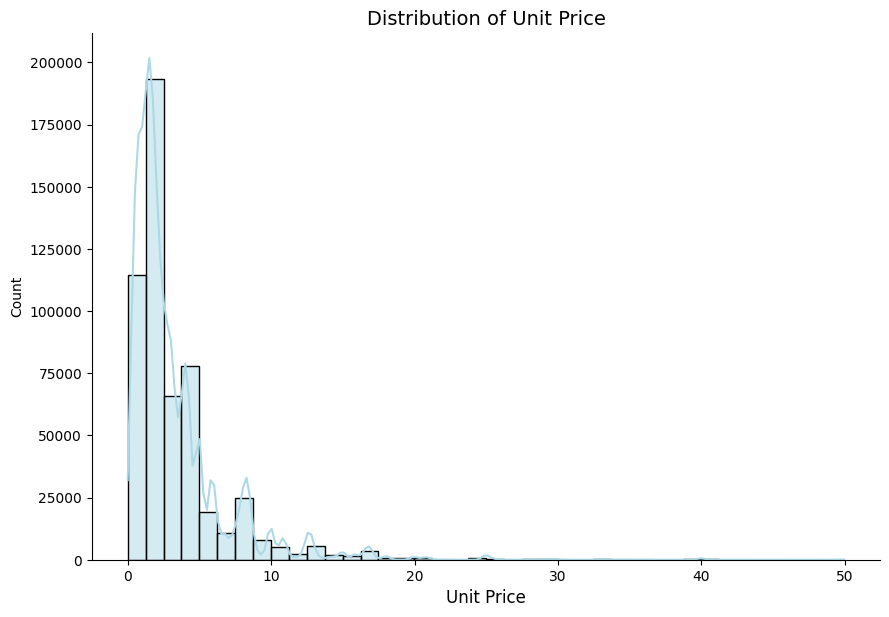

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.displot(df_nooutlier['UnitPrice'], bins=40, kde=True, color='lightblue', height=6, aspect=1.5)
plt.xlabel('Unit Price', fontsize=12)
plt.title('Distribution of Unit Price', fontsize=14)
plt.show()


**Key observations:**

**Right-Skewed Distribution:** The distribution is right-skewed, with the majority of unit prices concentrated near zero.

**Outliers:** A few data points have significantly higher unit prices, creating a long tail on the right side of the plot. These outliers could influence the mean and should be analyzed further.

**Peak:** The highest concentration of data points (the peak) is near a unit price of 0 to 5 shows that most items sold have a low unit price.

In [99]:


def UVA_numeric(data, var_group):
    """
    This function takes a dataframe and a variable group as arguments
    and converts the variable group to numeric.
    It then calculates the descriptives of the variable.
    """
    size = len(var_group)
    cols = 3  # Number of columns per row
    rows = (size // cols) + (size % cols > 0)  # Calculate number of rows needed

    plt.figure(figsize=(7*cols, 5*rows), dpi=100)

    for j, i in enumerate(var_group):
        # Check if the column exists in the DataFrame
        if i not in data.columns:
            print(f"Column '{i}' not found in the DataFrame.")
            continue

        try:
            # Attempt to convert the column to numeric
            data[i] = pd.to_numeric(data[i], errors='coerce')
        except TypeError as e:
            # Handle TypeError, print the original exception and problematic value
            print(f"Error converting column '{i}': {e}")
            problematic_value = data[i].iloc[0]  # Get the first problematic value
            print(f"Problematic value: {problematic_value}, Type: {type(problematic_value)}")
            continue

        # Calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # Calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.subplot(rows, cols, j + 1)
        sns.kdeplot(data[i], shade=True)

        # Plotting standard deviation, min/max, mean, and median using lines
        plt.axvline(x=points[0], color='black', linestyle='--', label="std_dev")
        plt.axvline(x=points[1], color='black', linestyle='--')
        plt.axvline(x=mini, color='orange', linestyle='-', label="min/max")
        plt.axvline(x=maxi, color='orange', linestyle='-')
        plt.axvline(x=mean, color='red', linestyle='-', label="mean")
        plt.axvline(x=median, color='blue', linestyle='-', label="median")

        plt.xlabel('{}'.format(i), fontsize=20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2)))

        plt.legend(loc='upper right')  # Place the legend in the upper right corner

    plt.tight_layout()
    plt.show()

<ipython-input-99-cf89c454cc34>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.to_numeric(data[i], errors='coerce')
<ipython-input-99-cf89c454cc34>:44: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[i], shade=True)
<ipython-input-99-cf89c454cc34>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = pd.to_numeric(data[i], errors='coerce')
<ipython-input-99-cf8

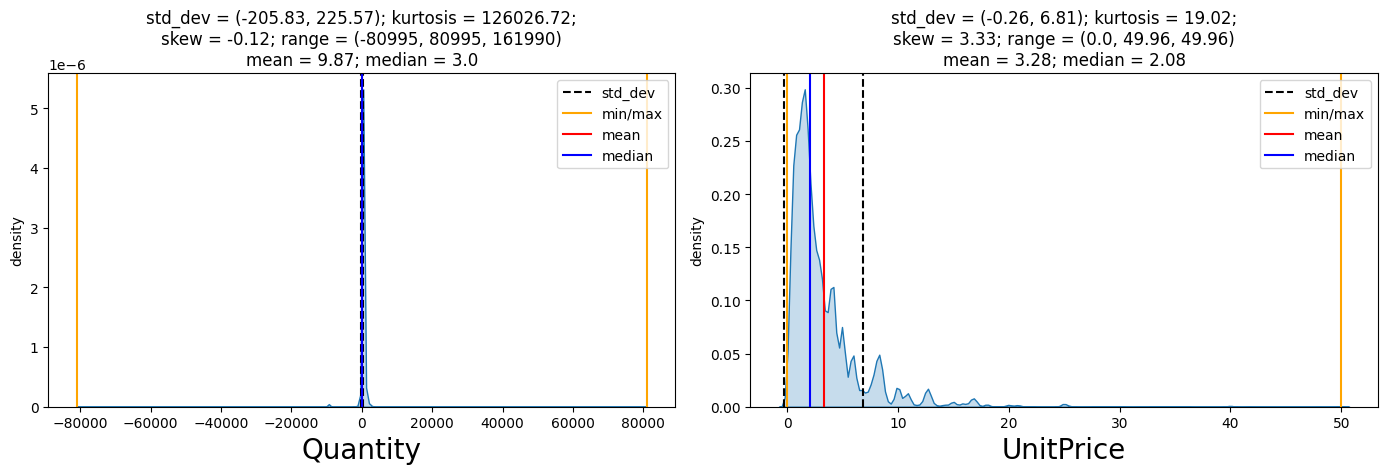

In [100]:
Numerical = ['Quantity', 'UnitPrice']
UVA_numeric(df_nooutlier, Numerical)

### 3.2.1. Categorical Variables: InvoiceNo, StockCode, Description, Country , CustomerID

#### 3.2.1.1 InvoiceNo

In [101]:
df[ 'InvoiceNo'].isnull().sum()

0

In [102]:
(df['InvoiceNo'].value_counts()).sort_values()

,count
InvoiceNo,
C558901,1
563934,1
536866,1
C559417,1
559414,1
...,...
558475,705
580729,721
581492,731


In [103]:
filtered_df = df[df['InvoiceNo'].str.startswith('C', na=False)]

filtered_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN,WeekStart
141,C536379,D,Discount,-1,2016-11-29,27.50,14527.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,15311.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,17548.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,17548.0,United Kingdom,2016,11,29,1,Tuesday,November,2016-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,14397.0,United Kingdom,2017,12,7,3,Thursday,December,2017-12-04
541541,C581499,M,Manual,-1,2017-12-07,224.69,15498.0,United Kingdom,2017,12,7,3,Thursday,December,2017-12-04
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,15311.0,United Kingdom,2017,12,7,3,Thursday,December,2017-12-04
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,17315.0,United Kingdom,2017,12,7,3,Thursday,December,2017-12-04


In [104]:
filtered_df[filtered_df['Quantity'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN,WeekStart


InvoiceNo starting with 'C' represent canceled orders, which are consistently associated with negative quantities.

#### 3.2.1.2 StockCode

In [105]:
df[ 'StockCode'].isnull().sum()

0

In [106]:
(df['StockCode'].value_counts()).sort_values()

,count
StockCode,
72759,1
84971l,1
90183c,1
85034b,1
90184c,1
...,...
20725,1639
47566,1727
85099B,2159


In [107]:
df[['StockCode','Description']].value_counts()

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2302
22423      REGENCY CAKESTAND 3 TIER              2200
85099B     JUMBO BAG RED RETROSPOT               2159
47566      PARTY BUNTING                         1727
20725      LUNCH BAG RED RETROSPOT               1638
                                                 ... 
35954      counted                                  1
           check                                    1
35923      check                                    1
35915C     damaged                                  1
m          Manual                                   1
Name: count, Length: 4792, dtype: int64

In [108]:
# Count occurrences of each combination of 'StockCode' and 'Description'
(df.groupby(['StockCode', 'Description']).size().reset_index(name='Count')).sort_values(by=['StockCode', 'Description'])

,StockCode,Description,Count
0,10002,INFLATABLE POLITICAL GLOBE,71
1,10080,GROOVY CACTUS INFLATABLE,22
2,10080,check,1
3,10120,DOGGY RUBBER,30
4,10123C,HEARTS WRAPPING TAPE,3
...,...,...,...
4787,gift_0001_20,to push order througha s stock was,1
4788,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,7
4789,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3
4790,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4


In [109]:
# Count occurrences of each combination of 'StockCode' and 'Description'
combination = (df.groupby(['Description', 'StockCode']).size().reset_index(name='Count')).sort_values(by=['Description', 'StockCode'])
combination

,Description,StockCode,Count
0,4 PURPLE FLOCK DINNER CANDLES,72800B,41
1,50'S CHRISTMAS GIFT BAG LARGE,23437,130
2,DOLLY GIRL BEAKER,23345,181
3,I LOVE LONDON MINI BACKPACK,23391,88
4,I LOVE LONDON MINI RUCKSACK,23391,1
...,...,...,...
4787,wrongly marked carton 22804,85123A,1
4788,wrongly marked. 23343 in box,20713,1
4789,wrongly sold (22719) barcode,22467,1
4790,wrongly sold as sets,85172,1


The **combination** of 'Description' and 'StockCode' is expected to be unique but it appears that data entry inconsistencies have resulted in duplicates.

#### 3.2.1.3 Country

In [110]:
df[ 'Country'].isnull().sum()

0

In [111]:
df['Country'].nunique()

38

In [112]:
(df['Country'].value_counts()).sort_values(ascending=False)

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


The company operates in 38 **countries**, with the highest sales occurring in the United Kingdom and the lowest in Saudi Arabia.

#### 3.2.1.4 CustomerID

In [113]:
df[ 'CustomerID'].isnull().sum()

135080

In [114]:
df[ 'CustomerID'].isnull().sum() / df.shape[0]

0.249266943342886

In [115]:
df['CustomerID'].nunique()

4372

Approximately 24% of **CustomerID** values are missing (NaN), and the dataset contains 4,372 unique customers.

The CustomerID is read as int, but these are categorical variables.

In [116]:
# Calculate the total sales for each row
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by country and calculate total sales per country
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Calculate the percentage of total sales for each country
total_sales = country_sales.sum()
country_sales_percentage = (country_sales / total_sales) * 100

# Combine sales and percentage
country_sales_summary = pd.DataFrame({
    'TotalSales': country_sales,
    'Percentage': country_sales_percentage
})

country_sales_summary.head(5)

,TotalSales,Percentage
Country,,
United Kingdom,8187806.364,83.996903
Netherlands,284661.540,2.920280
EIRE,263276.820,2.700899
Germany,221698.210,2.274353
France,197403.900,2.025123


The United Kingdom accounts for the vast majority of total sales (approximately 84%), with the Netherlands, EIRE, Germany, and France contributing less than 3% each.

In [117]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(x = norm_count, y = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

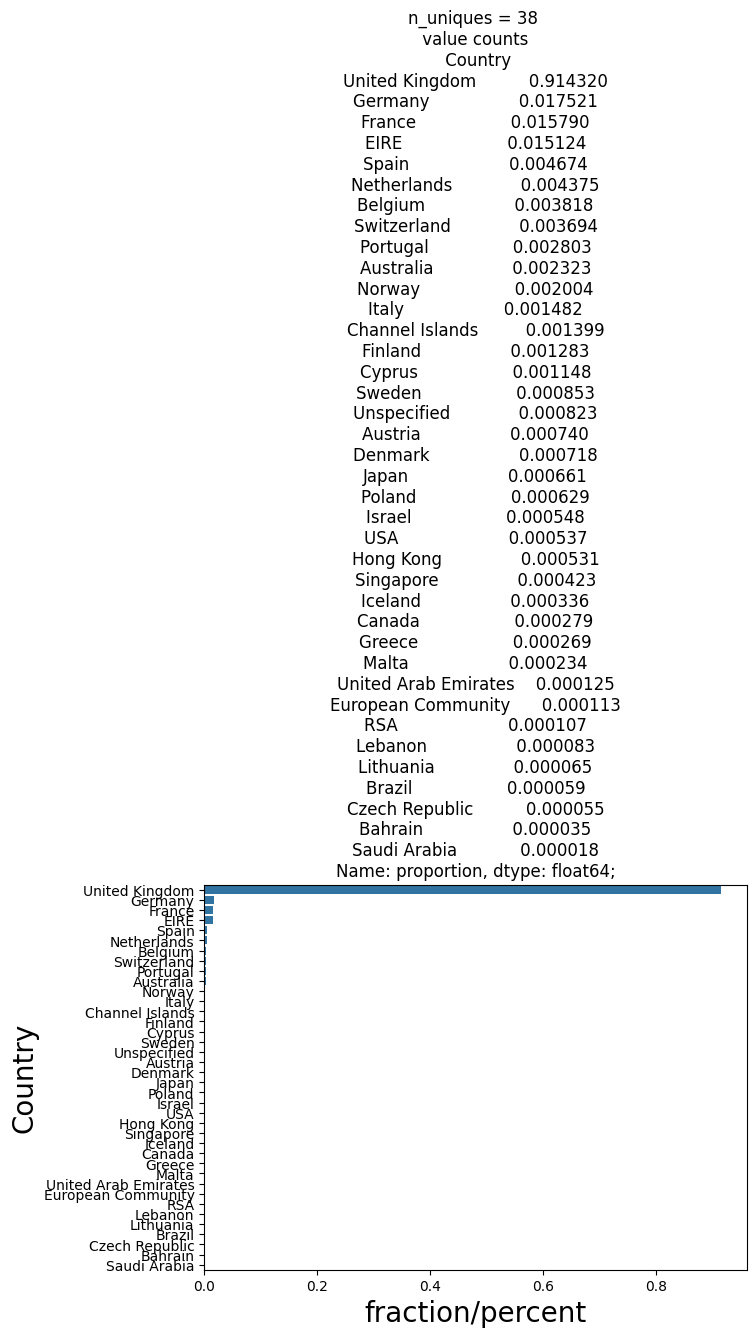

In [121]:
Categorical = ['Country']
UVA_category(df, Categorical)

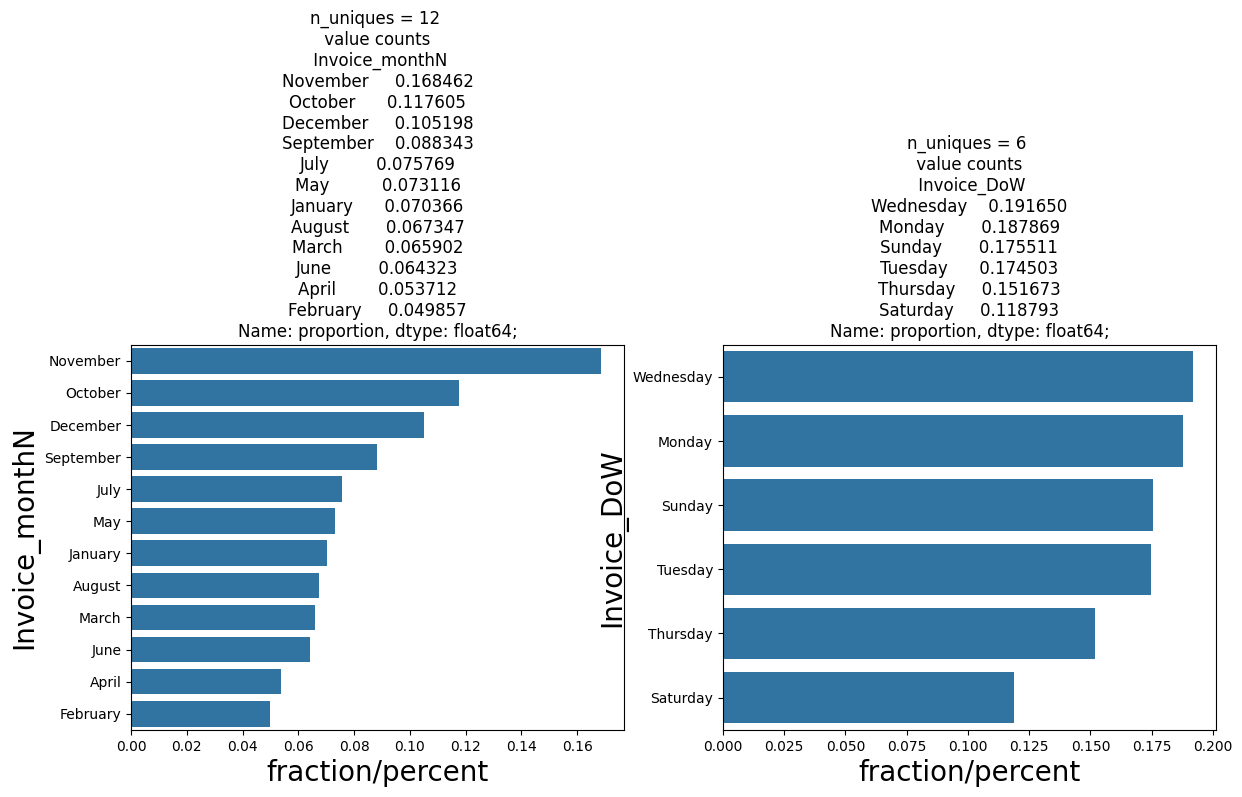

In [118]:
Date = ['Invoice_monthN','Invoice_DoW']
UVA_category(df, Date)

In [119]:
# Calculate the total sales for each row
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by CustomerID to calculate total sales and total quantity per customer
customer_summary = df.groupby('CustomerID').agg({
    'TotalSales': 'sum',
    'Quantity': 'sum'
}).sort_values(by='TotalSales', ascending=False)

# Calculate the percentage of total sales for each customer
total_sales = customer_summary['TotalSales'].sum()
customer_sales_percentage = (customer_summary['TotalSales'] / total_sales) * 100

# Combine sales, quantity, and percentage
customer_sales_summary = pd.DataFrame({
    'TotalSales': customer_summary['TotalSales'],
    'TotalQuantity': customer_summary['Quantity'],
    'Percentage': customer_sales_percentage
})

customer_sales_summary.head()

,TotalSales,TotalQuantity,Percentage
CustomerID,,,
14646.0,279489.02,196719,3.367311
18102.0,256438.49,64122,3.089596
17450.0,187482.17,69029,2.258803
14911.0,132572.62,77180,1.597248
12415.0,123725.45,77242,1.490656


Customer 14646 is the top buyer, contributing 3.37% of sales with 196,719 items purchased.